
Training with Hidden Layers: (160, 100), Learning Rate: 0.01
Epoch 1/20, Loss: 0.0398, Test Accuracy: 0.9294
Epoch 2/20, Loss: 0.0223, Test Accuracy: 0.9494
Epoch 3/20, Loss: 0.0149, Test Accuracy: 0.9589
Epoch 4/20, Loss: 0.0103, Test Accuracy: 0.9635
Epoch 5/20, Loss: 0.0079, Test Accuracy: 0.9686
Epoch 6/20, Loss: 0.0064, Test Accuracy: 0.9701
Epoch 7/20, Loss: 0.0055, Test Accuracy: 0.9729
Epoch 8/20, Loss: 0.0047, Test Accuracy: 0.9741
Epoch 9/20, Loss: 0.0040, Test Accuracy: 0.9739
Epoch 10/20, Loss: 0.0035, Test Accuracy: 0.9748
Epoch 11/20, Loss: 0.0032, Test Accuracy: 0.9749
Epoch 12/20, Loss: 0.0027, Test Accuracy: 0.9754
Epoch 13/20, Loss: 0.0022, Test Accuracy: 0.9758
Epoch 14/20, Loss: 0.0022, Test Accuracy: 0.9764
Epoch 15/20, Loss: 0.0019, Test Accuracy: 0.9766
Epoch 16/20, Loss: 0.0017, Test Accuracy: 0.9767
Epoch 17/20, Loss: 0.0016, Test Accuracy: 0.9768
Epoch 18/20, Loss: 0.0014, Test Accuracy: 0.9770
Epoch 19/20, Loss: 0.0015, Test Accuracy: 0.9771
Epoch 20/20, Los

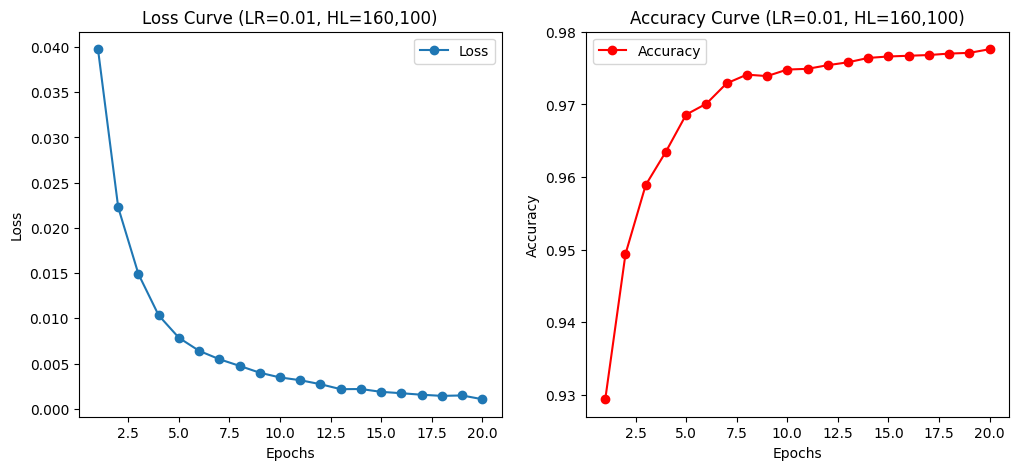

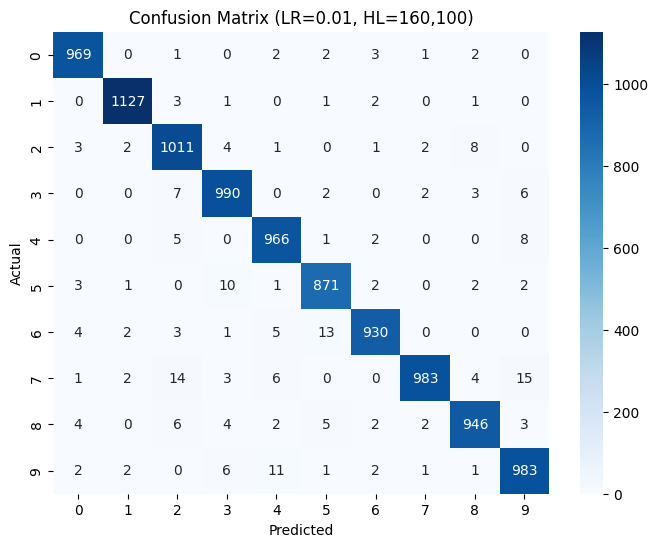


Training with Hidden Layers: (100, 100), Learning Rate: 0.01
Epoch 1/20, Loss: 0.0771, Test Accuracy: 0.9303
Epoch 2/20, Loss: 0.0445, Test Accuracy: 0.9498
Epoch 3/20, Loss: 0.0253, Test Accuracy: 0.9582
Epoch 4/20, Loss: 0.0167, Test Accuracy: 0.9633
Epoch 5/20, Loss: 0.0116, Test Accuracy: 0.9670
Epoch 6/20, Loss: 0.0086, Test Accuracy: 0.9694
Epoch 7/20, Loss: 0.0067, Test Accuracy: 0.9711
Epoch 8/20, Loss: 0.0052, Test Accuracy: 0.9718
Epoch 9/20, Loss: 0.0039, Test Accuracy: 0.9728
Epoch 10/20, Loss: 0.0033, Test Accuracy: 0.9734
Epoch 11/20, Loss: 0.0026, Test Accuracy: 0.9744
Epoch 12/20, Loss: 0.0021, Test Accuracy: 0.9750
Epoch 13/20, Loss: 0.0019, Test Accuracy: 0.9753
Epoch 14/20, Loss: 0.0016, Test Accuracy: 0.9756
Epoch 15/20, Loss: 0.0014, Test Accuracy: 0.9759
Epoch 16/20, Loss: 0.0012, Test Accuracy: 0.9765
Epoch 17/20, Loss: 0.0012, Test Accuracy: 0.9760
Epoch 18/20, Loss: 0.0011, Test Accuracy: 0.9768
Epoch 19/20, Loss: 0.0010, Test Accuracy: 0.9763
Epoch 20/20, Los

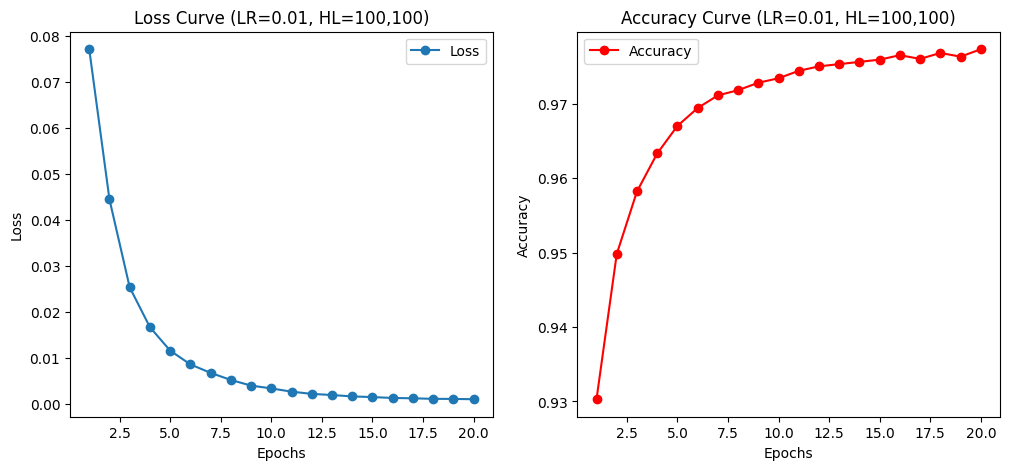

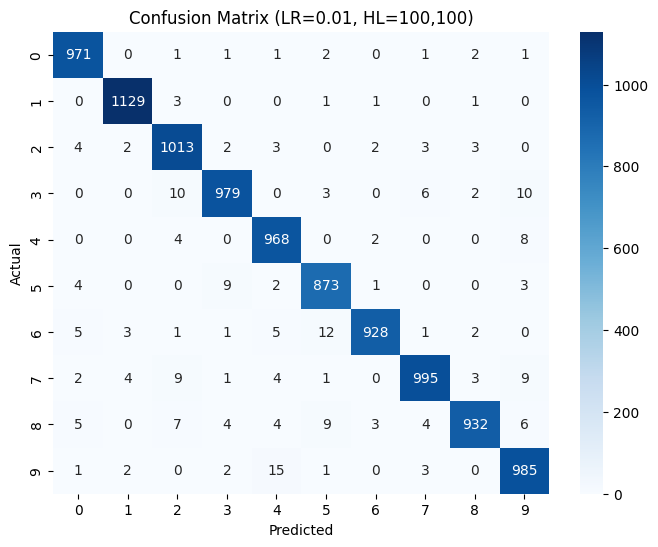

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Hyperparameter combinations
hidden_layer_configs = [(160, 100), (100, 100)]
learning_rate = 0.01
num_epochs = 20
batch_size = 10
n_input = 784
n_output = 10

# Iterate over different configurations
for (n_hidden1, n_hidden2) in hidden_layer_configs:
        print(f"\nTraining with Hidden Layers: ({n_hidden1}, {n_hidden2}), Learning Rate: {learning_rate}")

        # Initialize weights and biases
        initializer = tf.initializers.GlorotUniform()
        W1 = tf.Variable(initializer([n_input, n_hidden1]))
        b1 = tf.Variable(tf.zeros([n_hidden1]))
        W2 = tf.Variable(initializer([n_hidden1, n_hidden2]))
        b2 = tf.Variable(tf.zeros([n_hidden2]))
        W3 = tf.Variable(initializer([n_hidden2, n_output]))
        b3 = tf.Variable(tf.zeros([n_output]))

        # Define forward pass
        def forward_pass(x):
            z1 = tf.add(tf.matmul(x, W1), b1)
            a1 = tf.nn.relu(z1)  # ReLU activation
            z2 = tf.add(tf.matmul(a1, W2), b2)
            a2 = tf.nn.relu(z2)  # ReLU activation
            logits = tf.add(tf.matmul(a2, W3), b3)
            return logits

        # Loss function
        def compute_loss(logits, labels):
            return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

        # Accuracy metric
        def compute_accuracy(logits, labels):
            correct_preds = tf.equal(tf.argmax(logits, axis=1), tf.argmax(labels, axis=1))
            return tf.reduce_mean(tf.cast(correct_preds, tf.float32))

        # Optimizer
        optimizer = tf.optimizers.SGD(learning_rate)

        # Training loop
        train_losses, test_accuracies = [], []
        start_time = time.time()
        for epoch in range(num_epochs):
            for i in range(0, x_train.shape[0], batch_size):
                x_batch = x_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                with tf.GradientTape() as tape:
                    logits = forward_pass(x_batch)
                    loss = compute_loss(logits, y_batch)

                gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
                optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

            # Evaluate after each epoch
            test_logits = forward_pass(x_test)
            test_accuracy = compute_accuracy(test_logits, y_test)
            train_losses.append(loss.numpy())
            test_accuracies.append(test_accuracy.numpy())
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.numpy():.4f}, Test Accuracy: {test_accuracy.numpy():.4f}")

        # Calculate execution time
        execution_time = time.time() - start_time
        print(f"Execution Time: {execution_time:.2f} seconds")

        # Plot loss and accuracy curves
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', color='r', label='Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()
        plt.show()

        # Add space before confusion matrix
        print("\n" * 3)  # Adds three new lines for spacing
        plt.pause(1)  # Adds a slight delay before showing the confusion matrix

        # Confusion matrix
        y_pred = tf.argmax(forward_pass(x_test), axis=1).numpy()
        y_true = tf.argmax(y_test, axis=1).numpy()
        conf_matrix = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.show()

        print("============================================")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with Hidden Layers: (100, 100), Learning Rate: 0.1
Epoch 1/20, Loss: 0.0044, Test Accuracy: 0.9541
Epoch 2/20, Loss: 0.0011, Test Accuracy: 0.9618
Epoch 3/20, Loss: 0.0006, Test Accuracy: 0.9667
Epoch 4/20, Loss: 0.0002, Test Accuracy: 0.9666
Epoch 5/20, Loss: 0.0002, Test Accuracy: 0.9683
Epoch 6/20, Loss: 0.0001, Test Accuracy: 0.9740
Epoch 7/20, Loss: 0.0001, Test Accuracy: 0.9722
Epoch 8/20, Loss: 0.0000, Test Accuracy: 0.9693
Epoch 9/20, Loss: 0.0000, Test Accuracy: 0.9702
Epoch 10/20, Loss: 0.0000, Test Accuracy: 0.9686
Epoch 11/20, Loss: 0.0001, Test Accuracy: 0.9690
Epoch 12/20, Loss: 0.0688, Test Accuracy: 0.9703
Epoch 13/20, Loss: 0.0000, Test Accuracy: 0.9742
Epoch 14/20, Loss: 0.0000, Test Accuracy: 0.9672
Epoch 15/20, Loss: 0.0000, Test Accuracy: 0.9705
Epoch 16/20, Loss: 0.0000, Test Accuracy: 0.9750
Epoch 17/20, Loss: 0.0136, Test Accuracy: 0.9721
Epoch 18/20, Loss: 0.0000, Test Accuracy: 0.9727
Epoch 19/20, Lo

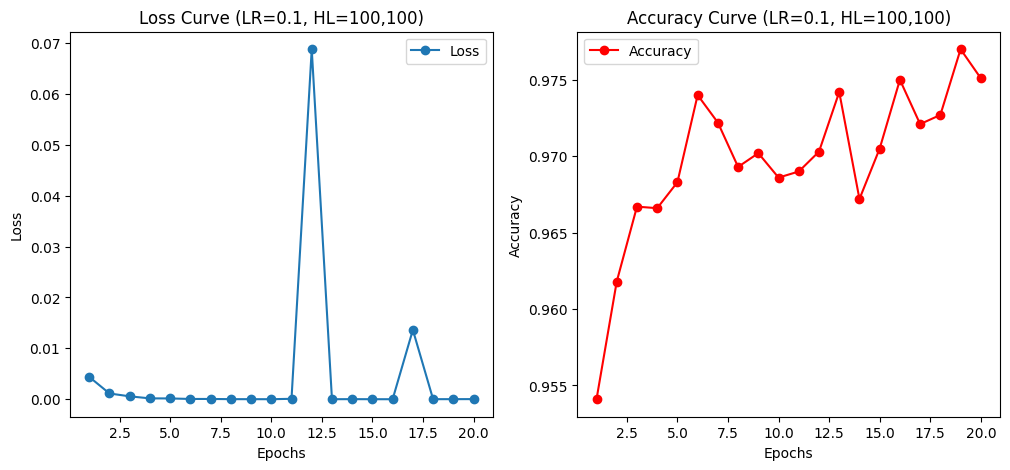

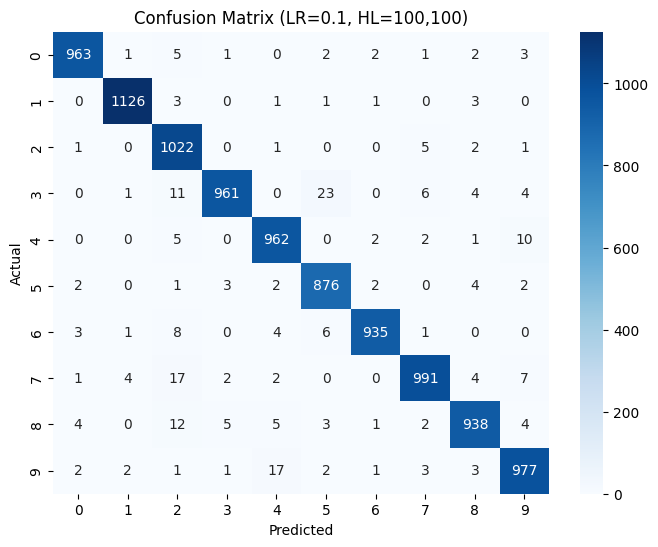


Training with Hidden Layers: (100, 160), Learning Rate: 0.1
Epoch 1/20, Loss: 0.0023, Test Accuracy: 0.9493
Epoch 2/20, Loss: 0.0006, Test Accuracy: 0.9651
Epoch 3/20, Loss: 0.0007, Test Accuracy: 0.9676
Epoch 4/20, Loss: 0.0010, Test Accuracy: 0.9708
Epoch 5/20, Loss: 0.0003, Test Accuracy: 0.9637
Epoch 6/20, Loss: 0.0001, Test Accuracy: 0.9693
Epoch 7/20, Loss: 0.0002, Test Accuracy: 0.9726
Epoch 8/20, Loss: 0.0002, Test Accuracy: 0.9705
Epoch 9/20, Loss: 0.0000, Test Accuracy: 0.9738
Epoch 10/20, Loss: 0.0000, Test Accuracy: 0.9750
Epoch 11/20, Loss: 0.0002, Test Accuracy: 0.9763
Epoch 12/20, Loss: 0.0001, Test Accuracy: 0.9720
Epoch 13/20, Loss: 0.0008, Test Accuracy: 0.9733
Epoch 14/20, Loss: 0.0000, Test Accuracy: 0.9734
Epoch 15/20, Loss: 0.0001, Test Accuracy: 0.9710
Epoch 16/20, Loss: 0.0000, Test Accuracy: 0.9668
Epoch 17/20, Loss: 0.0000, Test Accuracy: 0.9731
Epoch 18/20, Loss: 0.0000, Test Accuracy: 0.9804
Epoch 19/20, Loss: 0.0000, Test Accuracy: 0.9752
Epoch 20/20, Loss

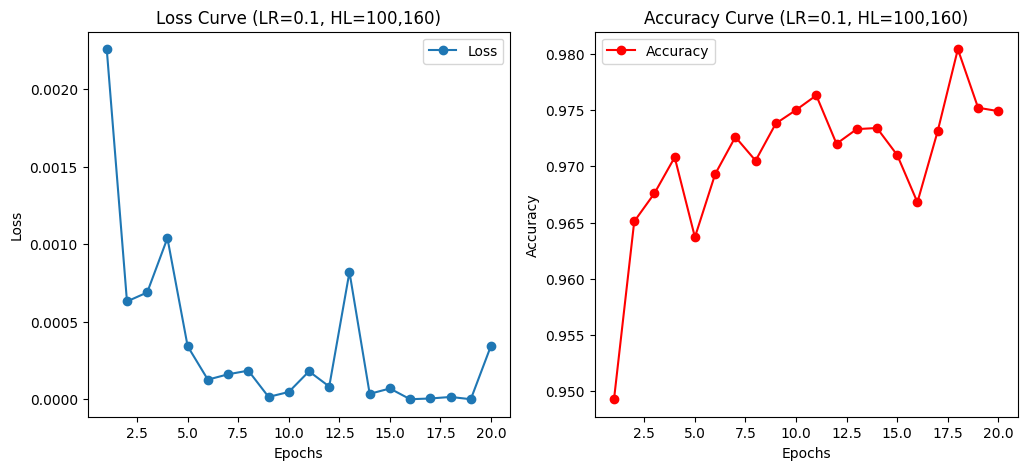

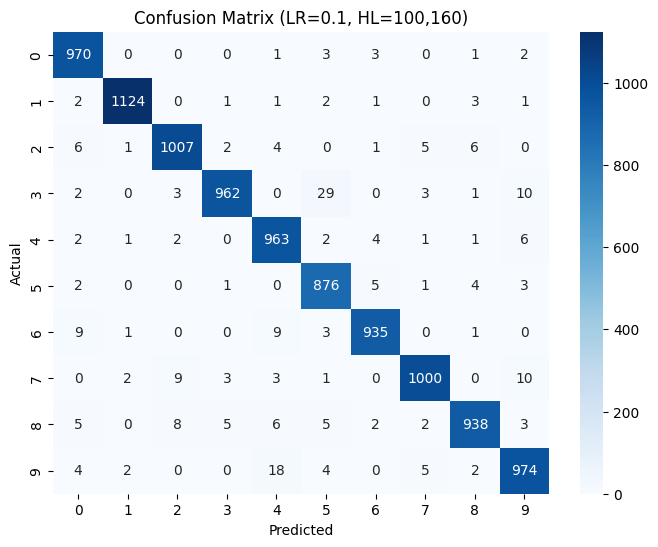


Training with Hidden Layers: (60, 60), Learning Rate: 0.1
Epoch 1/20, Loss: 0.0043, Test Accuracy: 0.9491
Epoch 2/20, Loss: 0.0006, Test Accuracy: 0.9532
Epoch 3/20, Loss: 0.0006, Test Accuracy: 0.9565
Epoch 4/20, Loss: 0.0012, Test Accuracy: 0.9639
Epoch 5/20, Loss: 0.0012, Test Accuracy: 0.9660
Epoch 6/20, Loss: 0.0009, Test Accuracy: 0.9648
Epoch 7/20, Loss: 0.0006, Test Accuracy: 0.9669
Epoch 8/20, Loss: 0.0022, Test Accuracy: 0.9714
Epoch 9/20, Loss: 0.0003, Test Accuracy: 0.9690
Epoch 10/20, Loss: 0.0000, Test Accuracy: 0.9666
Epoch 11/20, Loss: 0.0000, Test Accuracy: 0.9682
Epoch 12/20, Loss: 0.0001, Test Accuracy: 0.9646
Epoch 13/20, Loss: 0.0000, Test Accuracy: 0.9680
Epoch 14/20, Loss: 0.0000, Test Accuracy: 0.9713
Epoch 15/20, Loss: 0.0001, Test Accuracy: 0.9677
Epoch 16/20, Loss: 0.0000, Test Accuracy: 0.9682
Epoch 17/20, Loss: 0.0000, Test Accuracy: 0.9682
Epoch 18/20, Loss: 0.0000, Test Accuracy: 0.9674
Epoch 19/20, Loss: 0.0000, Test Accuracy: 0.9663
Epoch 20/20, Loss: 

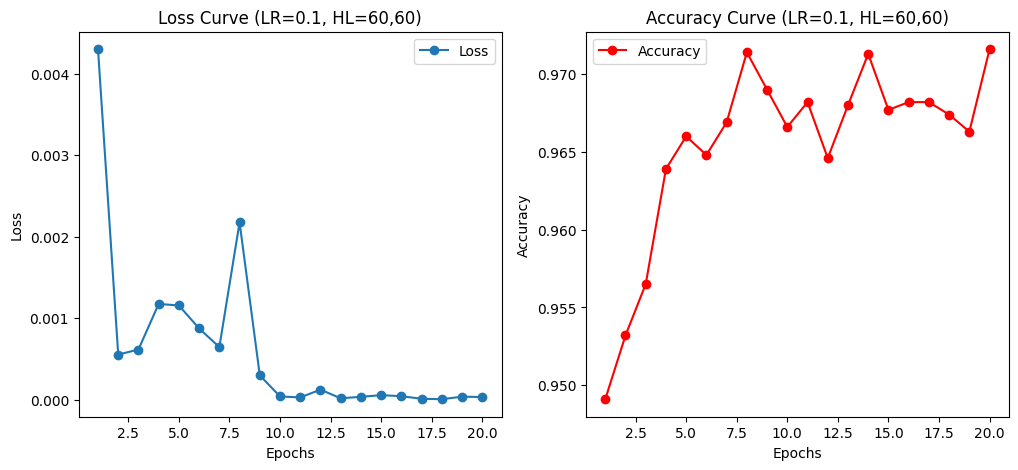

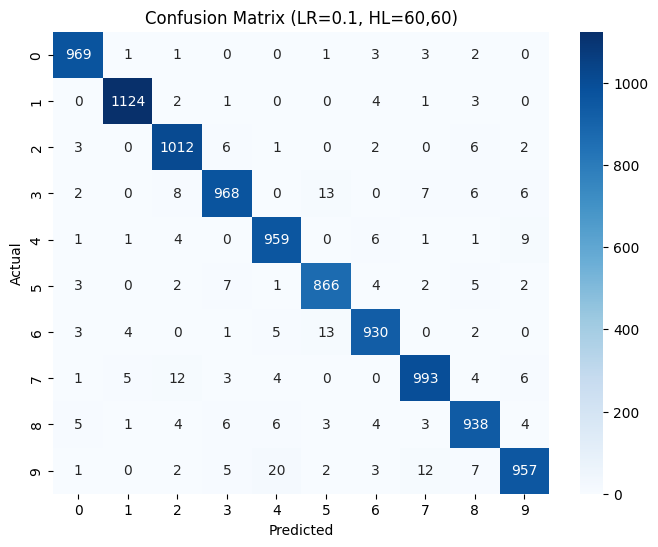


Training with Hidden Layers: (100, 60), Learning Rate: 0.1
Epoch 1/20, Loss: 0.0038, Test Accuracy: 0.9592
Epoch 2/20, Loss: 0.0017, Test Accuracy: 0.9587
Epoch 3/20, Loss: 0.0030, Test Accuracy: 0.9634
Epoch 4/20, Loss: 0.0010, Test Accuracy: 0.9682
Epoch 5/20, Loss: 0.0060, Test Accuracy: 0.9711
Epoch 6/20, Loss: 0.0006, Test Accuracy: 0.9687
Epoch 7/20, Loss: 0.0089, Test Accuracy: 0.9677
Epoch 8/20, Loss: 0.0186, Test Accuracy: 0.9709
Epoch 9/20, Loss: 0.0001, Test Accuracy: 0.9717
Epoch 10/20, Loss: 0.0001, Test Accuracy: 0.9710
Epoch 11/20, Loss: 0.0000, Test Accuracy: 0.9747
Epoch 12/20, Loss: 0.0001, Test Accuracy: 0.9749
Epoch 13/20, Loss: 0.0000, Test Accuracy: 0.9743
Epoch 14/20, Loss: 0.0000, Test Accuracy: 0.9714
Epoch 15/20, Loss: 0.0000, Test Accuracy: 0.9722
Epoch 16/20, Loss: 0.0000, Test Accuracy: 0.9725
Epoch 17/20, Loss: 0.0000, Test Accuracy: 0.9728
Epoch 18/20, Loss: 0.0000, Test Accuracy: 0.9751
Epoch 19/20, Loss: 0.0000, Test Accuracy: 0.9736
Epoch 20/20, Loss:

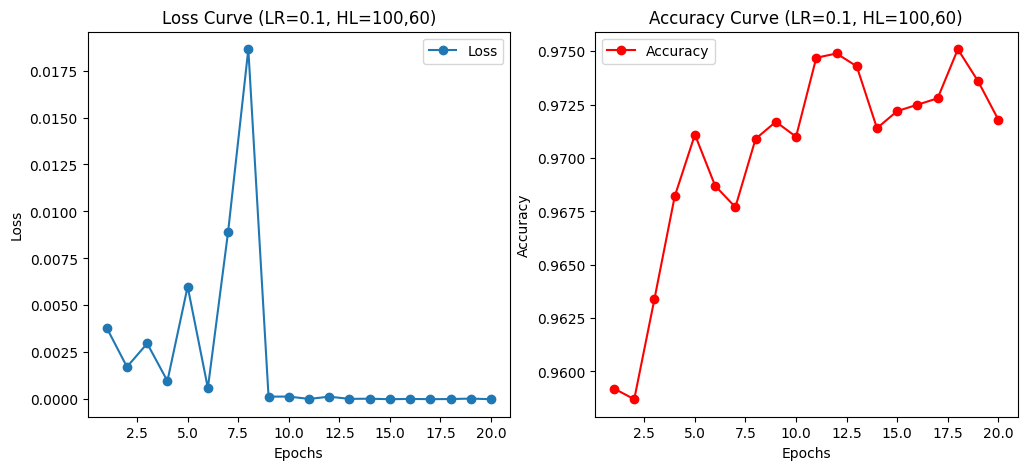

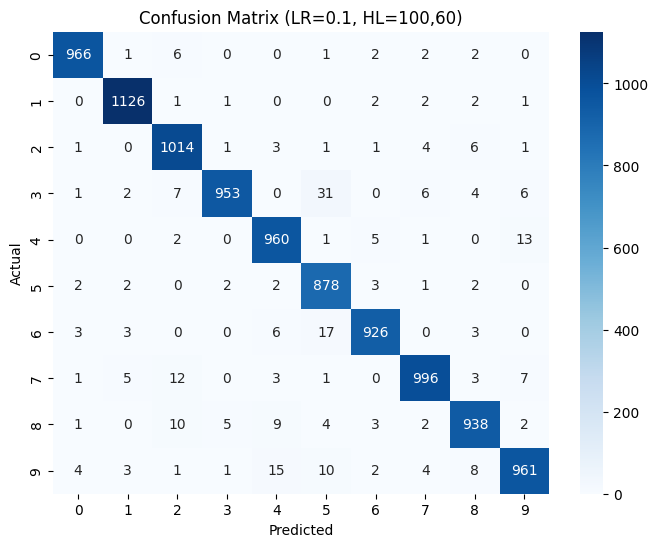

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Hyperparameter combinations
hidden_layer_configs = [(100, 100),(100, 160), (60, 60), (100, 60)]
learning_rate = 0.1
num_epochs = 20
batch_size = 10
n_input = 784
n_output = 10

# Iterate over different configurations
for (n_hidden1, n_hidden2) in hidden_layer_configs:
        print(f"\nTraining with Hidden Layers: ({n_hidden1}, {n_hidden2}), Learning Rate: {learning_rate}")

        # Initialize weights and biases
        initializer = tf.initializers.GlorotUniform()
        W1 = tf.Variable(initializer([n_input, n_hidden1]))
        b1 = tf.Variable(tf.zeros([n_hidden1]))
        W2 = tf.Variable(initializer([n_hidden1, n_hidden2]))
        b2 = tf.Variable(tf.zeros([n_hidden2]))
        W3 = tf.Variable(initializer([n_hidden2, n_output]))
        b3 = tf.Variable(tf.zeros([n_output]))

        # Define forward pass
        def forward_pass(x):
            z1 = tf.add(tf.matmul(x, W1), b1)
            a1 = tf.nn.relu(z1)  # ReLU activation
            z2 = tf.add(tf.matmul(a1, W2), b2)
            a2 = tf.nn.relu(z2)  # ReLU activation
            logits = tf.add(tf.matmul(a2, W3), b3)
            return logits

        # Loss function
        def compute_loss(logits, labels):
            return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

        # Accuracy metric
        def compute_accuracy(logits, labels):
            correct_preds = tf.equal(tf.argmax(logits, axis=1), tf.argmax(labels, axis=1))
            return tf.reduce_mean(tf.cast(correct_preds, tf.float32))

        # Optimizer
        optimizer = tf.optimizers.SGD(learning_rate)

        # Training loop
        train_losses, test_accuracies = [], []
        start_time = time.time()
        for epoch in range(num_epochs):
            for i in range(0, x_train.shape[0], batch_size):
                x_batch = x_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                with tf.GradientTape() as tape:
                    logits = forward_pass(x_batch)
                    loss = compute_loss(logits, y_batch)

                gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
                optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

            # Evaluate after each epoch
            test_logits = forward_pass(x_test)
            test_accuracy = compute_accuracy(test_logits, y_test)
            train_losses.append(loss.numpy())
            test_accuracies.append(test_accuracy.numpy())
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.numpy():.4f}, Test Accuracy: {test_accuracy.numpy():.4f}")

        # Calculate execution time
        execution_time = time.time() - start_time
        print(f"Execution Time: {execution_time:.2f} seconds")

        # Plot loss and accuracy curves
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', color='r', label='Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()
        plt.show()

        # Add space before confusion matrix
        print("\n" * 3)  # Adds three new lines for spacing
        plt.pause(1)  # Adds a slight delay before showing the confusion matrix

        # Confusion matrix
        y_pred = tf.argmax(forward_pass(x_test), axis=1).numpy()
        y_true = tf.argmax(y_test, axis=1).numpy()
        conf_matrix = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.show()

        print("============================================")



Training with Hidden Layers: (100, 160), Learning Rate: 0.01
Epoch 1/20, Loss: 0.0406, Test Accuracy: 0.9338
Epoch 2/20, Loss: 0.0235, Test Accuracy: 0.9501
Epoch 3/20, Loss: 0.0146, Test Accuracy: 0.9576
Epoch 4/20, Loss: 0.0101, Test Accuracy: 0.9631
Epoch 5/20, Loss: 0.0073, Test Accuracy: 0.9675
Epoch 6/20, Loss: 0.0058, Test Accuracy: 0.9692
Epoch 7/20, Loss: 0.0043, Test Accuracy: 0.9704
Epoch 8/20, Loss: 0.0033, Test Accuracy: 0.9717
Epoch 9/20, Loss: 0.0026, Test Accuracy: 0.9721
Epoch 10/20, Loss: 0.0021, Test Accuracy: 0.9728
Epoch 11/20, Loss: 0.0016, Test Accuracy: 0.9730
Epoch 12/20, Loss: 0.0013, Test Accuracy: 0.9739
Epoch 13/20, Loss: 0.0011, Test Accuracy: 0.9741
Epoch 14/20, Loss: 0.0009, Test Accuracy: 0.9740
Epoch 15/20, Loss: 0.0008, Test Accuracy: 0.9746
Epoch 16/20, Loss: 0.0007, Test Accuracy: 0.9747
Epoch 17/20, Loss: 0.0006, Test Accuracy: 0.9749
Epoch 18/20, Loss: 0.0005, Test Accuracy: 0.9749
Epoch 19/20, Loss: 0.0005, Test Accuracy: 0.9750
Epoch 20/20, Los

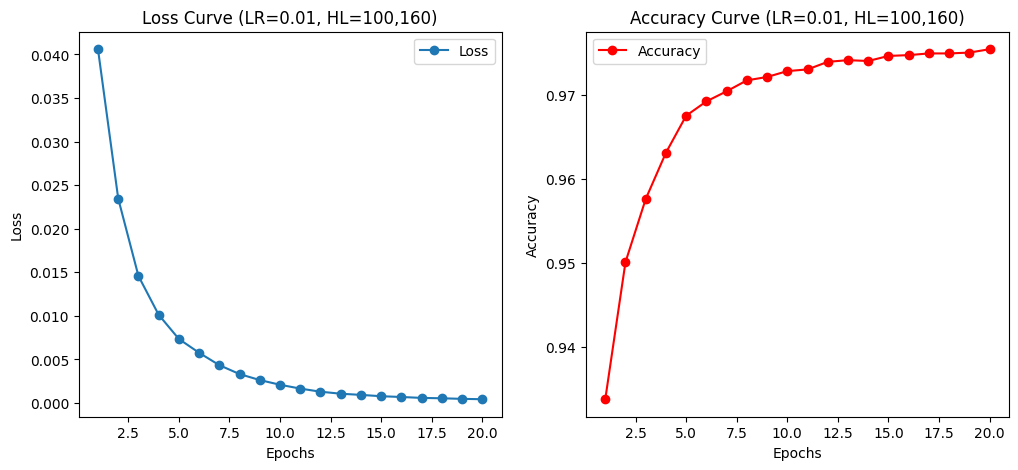

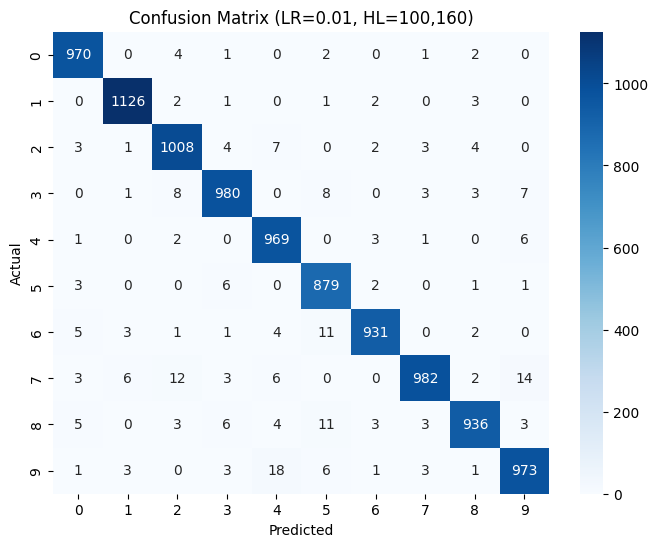


Training with Hidden Layers: (60, 60), Learning Rate: 0.01
Epoch 1/20, Loss: 0.0791, Test Accuracy: 0.9254
Epoch 2/20, Loss: 0.0469, Test Accuracy: 0.9431
Epoch 3/20, Loss: 0.0374, Test Accuracy: 0.9547
Epoch 4/20, Loss: 0.0332, Test Accuracy: 0.9618
Epoch 5/20, Loss: 0.0255, Test Accuracy: 0.9655
Epoch 6/20, Loss: 0.0218, Test Accuracy: 0.9675
Epoch 7/20, Loss: 0.0175, Test Accuracy: 0.9682
Epoch 8/20, Loss: 0.0150, Test Accuracy: 0.9696
Epoch 9/20, Loss: 0.0107, Test Accuracy: 0.9706
Epoch 10/20, Loss: 0.0082, Test Accuracy: 0.9719
Epoch 11/20, Loss: 0.0071, Test Accuracy: 0.9720
Epoch 12/20, Loss: 0.0059, Test Accuracy: 0.9727
Epoch 13/20, Loss: 0.0051, Test Accuracy: 0.9736
Epoch 14/20, Loss: 0.0043, Test Accuracy: 0.9736
Epoch 15/20, Loss: 0.0033, Test Accuracy: 0.9731
Epoch 16/20, Loss: 0.0028, Test Accuracy: 0.9733
Epoch 17/20, Loss: 0.0024, Test Accuracy: 0.9734
Epoch 18/20, Loss: 0.0021, Test Accuracy: 0.9737
Epoch 19/20, Loss: 0.0018, Test Accuracy: 0.9735
Epoch 20/20, Loss:

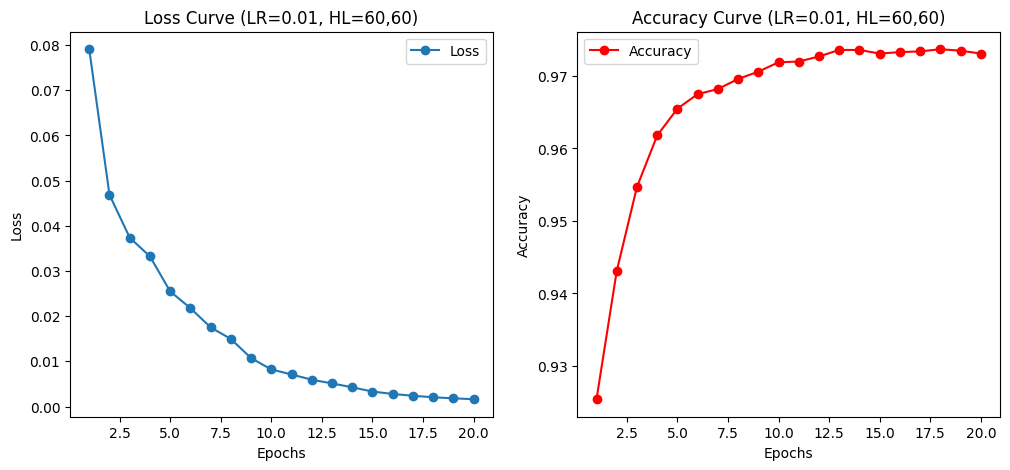

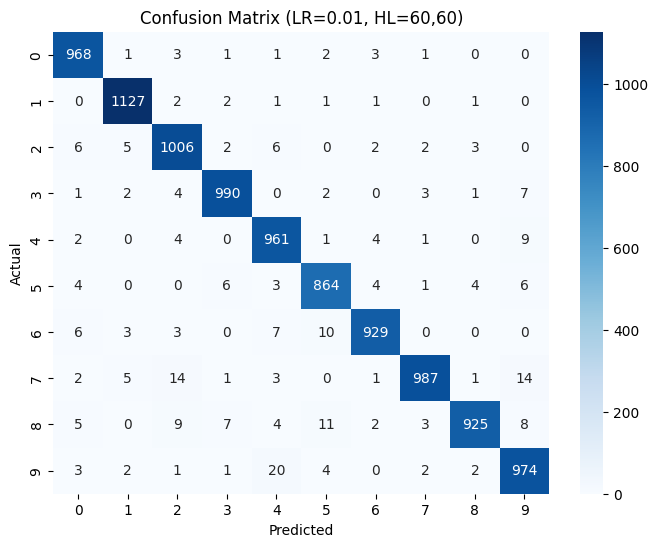


Training with Hidden Layers: (100, 60), Learning Rate: 0.01
Epoch 1/20, Loss: 0.0424, Test Accuracy: 0.9298
Epoch 2/20, Loss: 0.0279, Test Accuracy: 0.9479
Epoch 3/20, Loss: 0.0199, Test Accuracy: 0.9551
Epoch 4/20, Loss: 0.0146, Test Accuracy: 0.9615
Epoch 5/20, Loss: 0.0108, Test Accuracy: 0.9656
Epoch 6/20, Loss: 0.0083, Test Accuracy: 0.9676
Epoch 7/20, Loss: 0.0066, Test Accuracy: 0.9693
Epoch 8/20, Loss: 0.0052, Test Accuracy: 0.9715
Epoch 9/20, Loss: 0.0038, Test Accuracy: 0.9722
Epoch 10/20, Loss: 0.0029, Test Accuracy: 0.9726
Epoch 11/20, Loss: 0.0023, Test Accuracy: 0.9731
Epoch 12/20, Loss: 0.0020, Test Accuracy: 0.9740
Epoch 13/20, Loss: 0.0016, Test Accuracy: 0.9740
Epoch 14/20, Loss: 0.0012, Test Accuracy: 0.9744
Epoch 15/20, Loss: 0.0010, Test Accuracy: 0.9756
Epoch 16/20, Loss: 0.0008, Test Accuracy: 0.9750
Epoch 17/20, Loss: 0.0007, Test Accuracy: 0.9755
Epoch 18/20, Loss: 0.0005, Test Accuracy: 0.9760
Epoch 19/20, Loss: 0.0004, Test Accuracy: 0.9765
Epoch 20/20, Loss

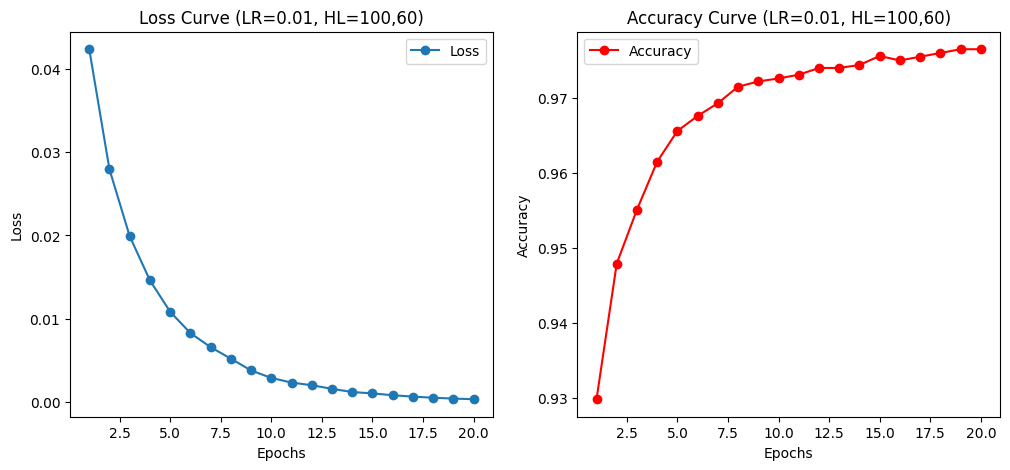

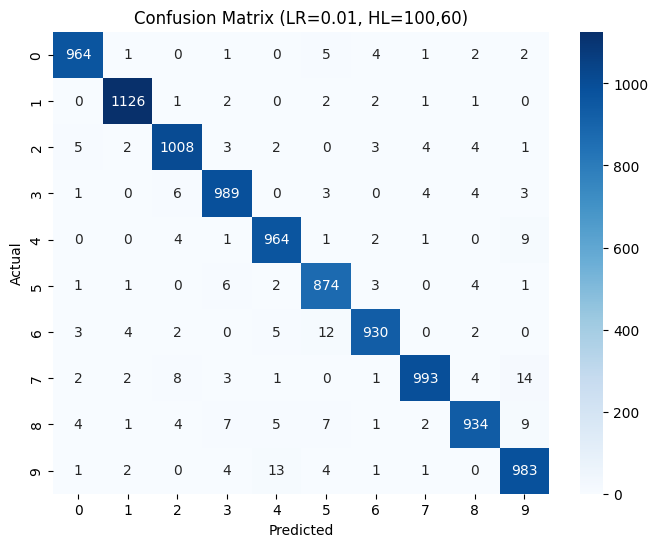

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Hyperparameter combinations
hidden_layer_configs = [(100, 160), (60, 60), (100, 60)]
learning_rate = 0.01
num_epochs = 20
batch_size = 10
n_input = 784
n_output = 10

# Iterate over different configurations
for (n_hidden1, n_hidden2) in hidden_layer_configs:
        print(f"\nTraining with Hidden Layers: ({n_hidden1}, {n_hidden2}), Learning Rate: {learning_rate}")

        # Initialize weights and biases
        initializer = tf.initializers.GlorotUniform()
        W1 = tf.Variable(initializer([n_input, n_hidden1]))
        b1 = tf.Variable(tf.zeros([n_hidden1]))
        W2 = tf.Variable(initializer([n_hidden1, n_hidden2]))
        b2 = tf.Variable(tf.zeros([n_hidden2]))
        W3 = tf.Variable(initializer([n_hidden2, n_output]))
        b3 = tf.Variable(tf.zeros([n_output]))

        # Define forward pass
        def forward_pass(x):
            z1 = tf.add(tf.matmul(x, W1), b1)
            a1 = tf.nn.relu(z1)  # ReLU activation
            z2 = tf.add(tf.matmul(a1, W2), b2)
            a2 = tf.nn.relu(z2)  # ReLU activation
            logits = tf.add(tf.matmul(a2, W3), b3)
            return logits

        # Loss function
        def compute_loss(logits, labels):
            return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

        # Accuracy metric
        def compute_accuracy(logits, labels):
            correct_preds = tf.equal(tf.argmax(logits, axis=1), tf.argmax(labels, axis=1))
            return tf.reduce_mean(tf.cast(correct_preds, tf.float32))

        # Optimizer
        optimizer = tf.optimizers.SGD(learning_rate)

        # Training loop
        train_losses, test_accuracies = [], []
        start_time = time.time()
        for epoch in range(num_epochs):
            for i in range(0, x_train.shape[0], batch_size):
                x_batch = x_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                with tf.GradientTape() as tape:
                    logits = forward_pass(x_batch)
                    loss = compute_loss(logits, y_batch)

                gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
                optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

            # Evaluate after each epoch
            test_logits = forward_pass(x_test)
            test_accuracy = compute_accuracy(test_logits, y_test)
            train_losses.append(loss.numpy())
            test_accuracies.append(test_accuracy.numpy())
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.numpy():.4f}, Test Accuracy: {test_accuracy.numpy():.4f}")

        # Calculate execution time
        execution_time = time.time() - start_time
        print(f"Execution Time: {execution_time:.2f} seconds")

        # Plot loss and accuracy curves
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', color='r', label='Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()
        plt.show()

        # Add space before confusion matrix
        print("\n" * 3)  # Adds three new lines for spacing
        plt.pause(1)  # Adds a slight delay before showing the confusion matrix

        # Confusion matrix
        y_pred = tf.argmax(forward_pass(x_test), axis=1).numpy()
        y_true = tf.argmax(y_test, axis=1).numpy()
        conf_matrix = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.show()

        print("============================================")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with Hidden Layers: (100, 160), Learning Rate: 1.0
Epoch 1/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 2/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 3/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 4/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 5/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 6/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 7/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 8/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 9/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 10/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 11/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 12/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 13/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 14/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 15/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 16/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 17/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 18/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 19/20, Lo

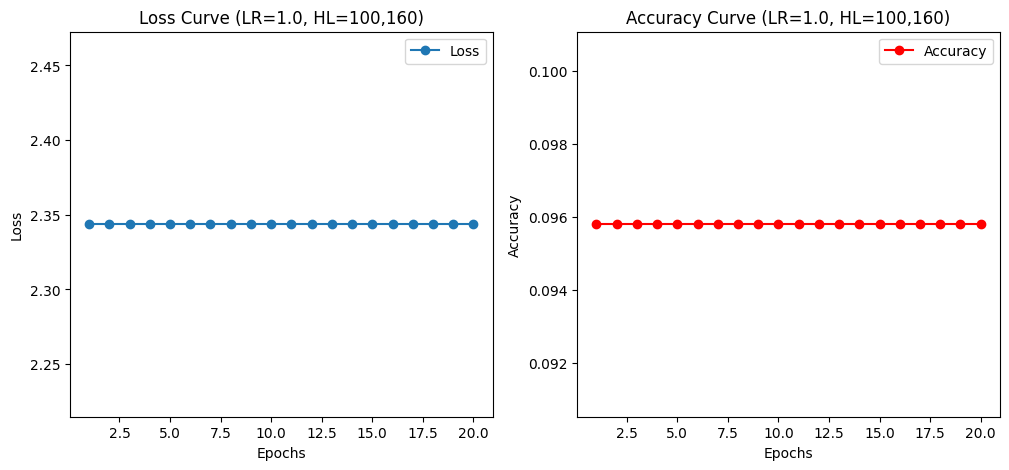

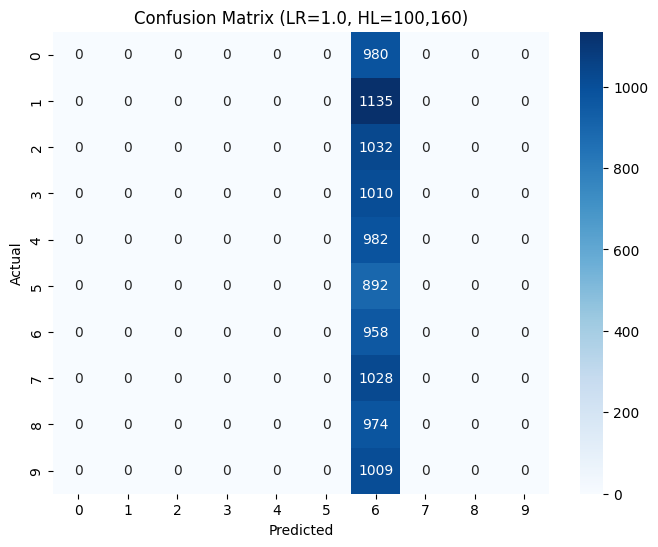


Training with Hidden Layers: (60, 60), Learning Rate: 1.0
Epoch 1/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 2/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 3/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 4/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 5/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 6/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 7/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 8/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 9/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 10/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 11/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 12/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 13/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 14/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 15/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 16/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 17/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 18/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 19/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 20/20, Loss: 

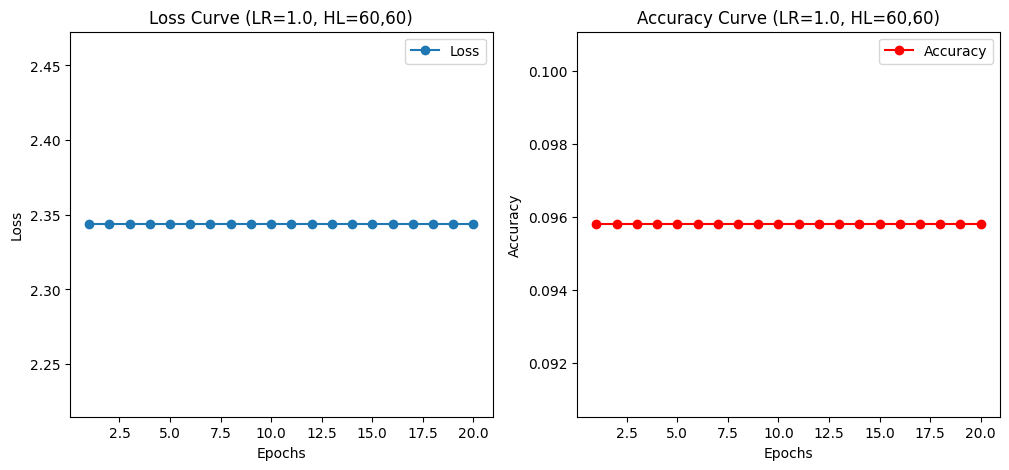

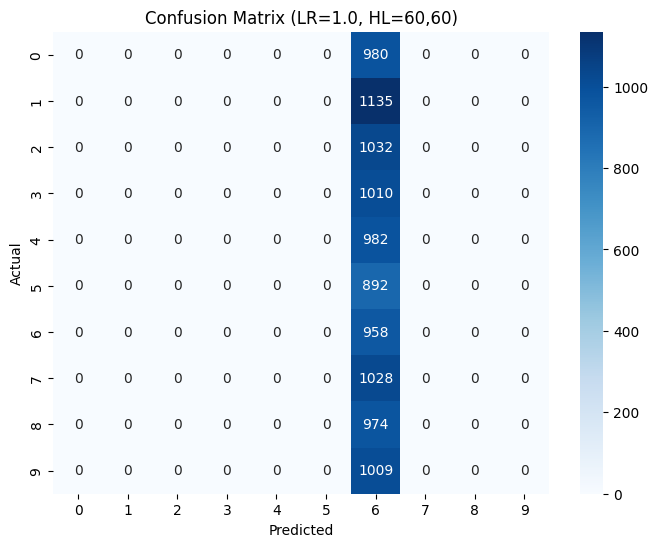


Training with Hidden Layers: (100, 60), Learning Rate: 1.0
Epoch 1/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 2/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 3/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 4/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 5/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 6/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 7/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 8/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 9/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 10/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 11/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 12/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 13/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 14/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 15/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 16/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 17/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 18/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 19/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 20/20, Loss:

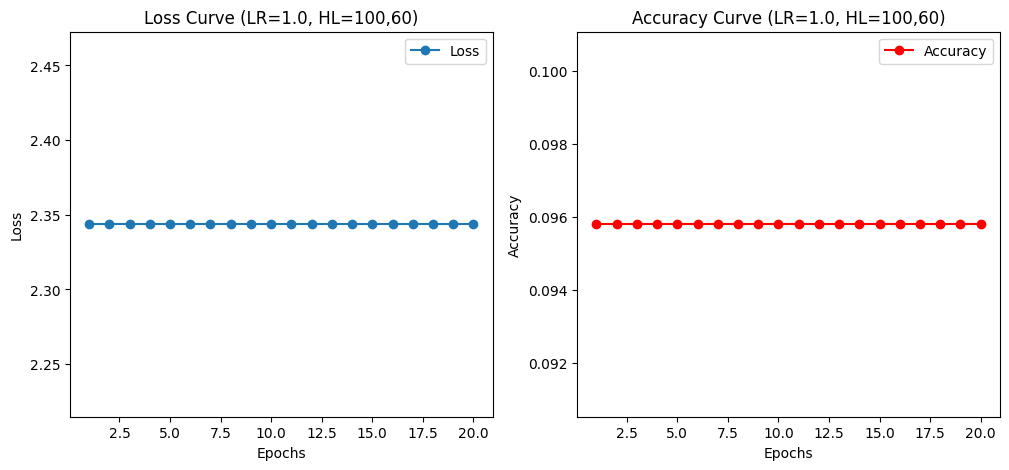

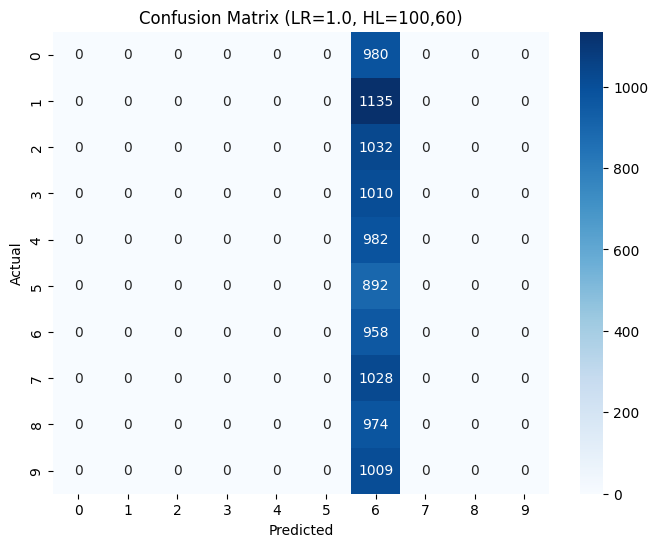

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Hyperparameter combinations
hidden_layer_configs = [(100, 160), (60, 60), (100, 60)]
learning_rate = 1.0
num_epochs = 20
batch_size = 10
n_input = 784
n_output = 10

# Iterate over different configurations
for (n_hidden1, n_hidden2) in hidden_layer_configs:
        print(f"\nTraining with Hidden Layers: ({n_hidden1}, {n_hidden2}), Learning Rate: {learning_rate}")

        # Initialize weights and biases
        initializer = tf.initializers.GlorotUniform()
        W1 = tf.Variable(initializer([n_input, n_hidden1]))
        b1 = tf.Variable(tf.zeros([n_hidden1]))
        W2 = tf.Variable(initializer([n_hidden1, n_hidden2]))
        b2 = tf.Variable(tf.zeros([n_hidden2]))
        W3 = tf.Variable(initializer([n_hidden2, n_output]))
        b3 = tf.Variable(tf.zeros([n_output]))

        # Define forward pass
        def forward_pass(x):
            z1 = tf.add(tf.matmul(x, W1), b1)
            a1 = tf.nn.relu(z1)  # ReLU activation
            z2 = tf.add(tf.matmul(a1, W2), b2)
            a2 = tf.nn.relu(z2)  # ReLU activation
            logits = tf.add(tf.matmul(a2, W3), b3)
            return logits

        # Loss function
        def compute_loss(logits, labels):
            return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

        # Accuracy metric
        def compute_accuracy(logits, labels):
            correct_preds = tf.equal(tf.argmax(logits, axis=1), tf.argmax(labels, axis=1))
            return tf.reduce_mean(tf.cast(correct_preds, tf.float32))

        # Optimizer
        optimizer = tf.optimizers.SGD(learning_rate)

        # Training loop
        train_losses, test_accuracies = [], []
        start_time = time.time()
        for epoch in range(num_epochs):
            for i in range(0, x_train.shape[0], batch_size):
                x_batch = x_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                with tf.GradientTape() as tape:
                    logits = forward_pass(x_batch)
                    loss = compute_loss(logits, y_batch)

                gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
                optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

            # Evaluate after each epoch
            test_logits = forward_pass(x_test)
            test_accuracy = compute_accuracy(test_logits, y_test)
            train_losses.append(loss.numpy())
            test_accuracies.append(test_accuracy.numpy())
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.numpy():.4f}, Test Accuracy: {test_accuracy.numpy():.4f}")

        # Calculate execution time
        execution_time = time.time() - start_time
        print(f"Execution Time: {execution_time:.2f} seconds")

        # Plot loss and accuracy curves
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', color='r', label='Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()
        plt.show()

        # Add space before confusion matrix
        print("\n" * 3)  # Adds three new lines for spacing
        plt.pause(1)  # Adds a slight delay before showing the confusion matrix

        # Confusion matrix
        y_pred = tf.argmax(forward_pass(x_test), axis=1).numpy()
        y_true = tf.argmax(y_test, axis=1).numpy()
        conf_matrix = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.show()

        print("============================================")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Training with Hidden Layers: (100, 100), Learning Rate: 1.0
Epoch 1/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 2/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 3/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 4/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 5/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 6/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 7/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 8/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 9/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 10/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 11/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 12/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 13/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 14/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 15/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 16/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 17/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 18/20, Loss: 2.3437, Test Accuracy: 0.0958
Epoch 19/20, Lo

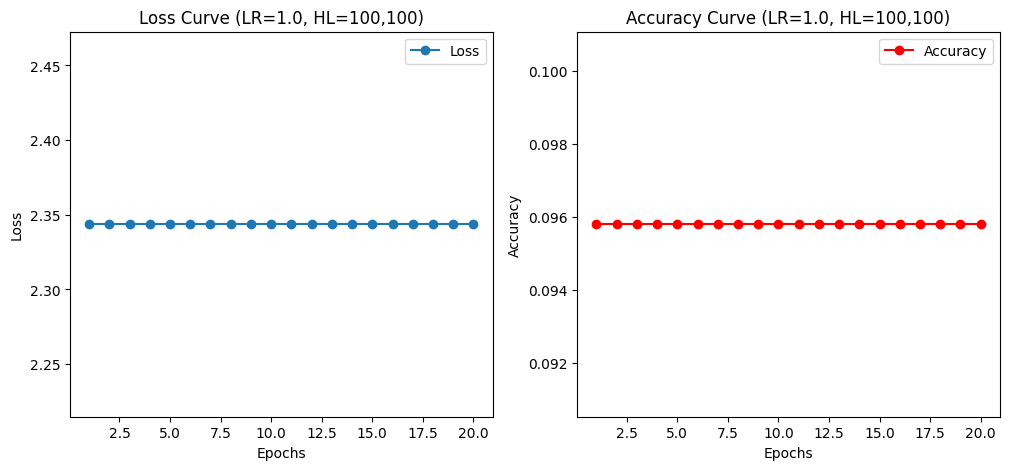

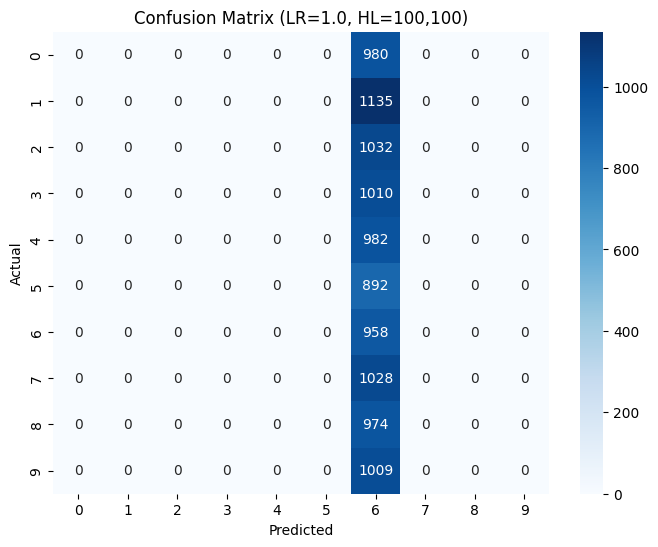

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Hyperparameter combinations
hidden_layer_configs = [ (100, 100)]
learning_rate = 1.0
num_epochs = 20
batch_size = 10
n_input = 784
n_output = 10

# Iterate over different configurations
for (n_hidden1, n_hidden2) in hidden_layer_configs:
        print(f"\nTraining with Hidden Layers: ({n_hidden1}, {n_hidden2}), Learning Rate: {learning_rate}")

        # Initialize weights and biases
        initializer = tf.initializers.GlorotUniform()
        W1 = tf.Variable(initializer([n_input, n_hidden1]))
        b1 = tf.Variable(tf.zeros([n_hidden1]))
        W2 = tf.Variable(initializer([n_hidden1, n_hidden2]))
        b2 = tf.Variable(tf.zeros([n_hidden2]))
        W3 = tf.Variable(initializer([n_hidden2, n_output]))
        b3 = tf.Variable(tf.zeros([n_output]))

        # Define forward pass
        def forward_pass(x):
            z1 = tf.add(tf.matmul(x, W1), b1)
            a1 = tf.nn.relu(z1)  # ReLU activation
            z2 = tf.add(tf.matmul(a1, W2), b2)
            a2 = tf.nn.relu(z2)  # ReLU activation
            logits = tf.add(tf.matmul(a2, W3), b3)
            return logits

        # Loss function
        def compute_loss(logits, labels):
            return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

        # Accuracy metric
        def compute_accuracy(logits, labels):
            correct_preds = tf.equal(tf.argmax(logits, axis=1), tf.argmax(labels, axis=1))
            return tf.reduce_mean(tf.cast(correct_preds, tf.float32))

        # Optimizer
        optimizer = tf.optimizers.SGD(learning_rate)

        # Training loop
        train_losses, test_accuracies = [], []
        start_time = time.time()
        for epoch in range(num_epochs):
            for i in range(0, x_train.shape[0], batch_size):
                x_batch = x_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                with tf.GradientTape() as tape:
                    logits = forward_pass(x_batch)
                    loss = compute_loss(logits, y_batch)

                gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
                optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

            # Evaluate after each epoch
            test_logits = forward_pass(x_test)
            test_accuracy = compute_accuracy(test_logits, y_test)
            train_losses.append(loss.numpy())
            test_accuracies.append(test_accuracy.numpy())
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.numpy():.4f}, Test Accuracy: {test_accuracy.numpy():.4f}")

        # Calculate execution time
        execution_time = time.time() - start_time
        print(f"Execution Time: {execution_time:.2f} seconds")

        # Plot loss and accuracy curves
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', color='r', label='Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy Curve (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.legend()
        plt.show()

        # Add space before confusion matrix
        print("\n" * 3)  # Adds three new lines for spacing
        plt.pause(1)  # Adds a slight delay before showing the confusion matrix

        # Confusion matrix
        y_pred = tf.argmax(forward_pass(x_test), axis=1).numpy()
        y_true = tf.argmax(y_test, axis=1).numpy()
        conf_matrix = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix (LR={learning_rate}, HL={n_hidden1},{n_hidden2})')
        plt.show()

        print("============================================")
